In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL'] = "True"

In [4]:
!pip install --upgrade pip
!pip install scikit-learn
!pip install --upgrade bltk


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.4/17.4 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432520 sha256=f6e3692c1d7093eed2a48d7b5244b86188943fe2b045544cfacb56c007b349b0
  Stored in directory: /root/.cache/pip/wheels/52/7d/57/4806e1ef5d1ad1491ce0ac43aaa0377293efbc9a81d5b7e6c8
  Created wheel for sklearn: filename=sklearn-0.0.post12-py3-none-any.whl size=2180 sha256=7974a23b46cad0f25f0005056fc36266f8b7a198057c1d962a2bf57255071fd9
  Stored in directory: /root/.cache/pip/wheels/

##**Importing Libraries**

In [5]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import codecs

In [6]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [7]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['‡¶Ö', '‡¶Ü', '‡¶á', '‡¶à', '‡¶â', '‡¶ä', '‡¶ã', '‡¶å', '‡¶è', '‡¶ê', '‡¶ì', '‡¶î']
Vowel signs: ['‡¶æ', '‡¶ø', '‡ßÄ', '‡ßÅ', '‡ßÇ', '‡ßÉ', '‡ßÑ', '‡ßá', '‡ßà', '‡ßã', '‡ßå']
Consonants: ['‡¶ï', '‡¶ñ', '‡¶ó', '‡¶ò', '‡¶ô', '‡¶ö', '‡¶õ', '‡¶ú', '‡¶ù', '‡¶û', '‡¶ü', '‡¶†', '‡¶°', '‡¶¢', '‡¶£', '‡¶§', '‡¶•', '‡¶¶', '‡¶ß', '‡¶®', '‡¶™', '‡¶´', '‡¶¨', '‡¶≠', '‡¶Æ', '‡¶Ø', '‡¶∞', '‡¶≤', '‡¶∂', '‡¶∑', '‡¶∏', '‡¶π', '‡ßú', '‡ßù', '‡ßü', '‡ßé', '‡¶Ç', '‡¶É', '‡¶Å']
Digits: ['‡ß¶', '‡ßß', '‡ß®', '‡ß©', '‡ß™', '‡ß´', '‡ß¨', '‡ß≠', '‡ßÆ', '‡ßØ']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '√ó', '√∑']
Punctuation marks: ['‡•§', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '‚Äì', '‚Äî', '‚Äï', '~']
Others: ['‡ß≥', '‡ß∫', '‡ßç', '‡¶Ä', '‡¶Ω', '#', '$']


In [8]:
INPUT_FILE = "/content/drive/My Drive/SentimentalAnalysis/Dataset/ecommerce_dataset.txt"
stopwords_list ="/content/drive/My Drive/SentimentalAnalysis/Dataset/stopwords.txt"


##**Dataset Preparation and Cleaning**

In [9]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()

fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:

    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)

    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords)
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()



Streaming output truncated to the last 5000 lines.
Truncating StopWords: ['‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ú‡¶ø‡¶Ç', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶ì‡ßü‡¶æ‡¶ü‡¶æ‡¶∞', '‡¶™‡ßç‡¶∞‡ßÅ‡¶´', '‡¶§‡¶æ‡ßú‡¶æ‡¶§‡¶æ‡ßú‡¶ø‡¶á', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶π‡¶æ‡¶§‡ßá', '‡¶™‡ßá‡ßü‡ßá‡¶õ‡¶ø', '‡¶∏‡¶¨‡¶Æ‡¶ø‡¶≤‡¶ø‡ßü‡ßá', '‡¶∏‡¶®‡ßç‡¶§‡ßã‡¶∑‡¶ú‡¶®‡¶ï']
***************************************************************************************
Label:  1
Sentence:  ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶ü‡¶æ ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶≠‡¶æ‡¶≤‡ßã ‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ü‡¶ø‡¶Ç ‡¶ü‡¶æ ‡¶Ö‡¶®‡ßá‡¶ï ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶õ‡¶ø‡¶≤ ‡¶ò‡¶°‡¶º‡¶ø‡¶ü‡¶æ ‡¶Ö‡¶®‡ßá‡¶ï ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶è‡¶ï ‡¶ï‡¶•‡¶æ‡¶Ø‡¶º ‡¶¨‡¶≤‡¶§‡ßá ‡¶ó‡ßá‡¶≤‡ßá ‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£
Afert Tokenizing:  ['‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶ü‡¶æ', '‡¶ñ‡ßÅ‡¶¨‡¶á', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ü‡¶ø‡¶Ç', '‡¶ü‡¶æ', '‡¶Ö‡¶®‡ßá‡¶ï', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶õ‡¶ø‡¶≤', '‡¶ò‡¶°‡¶º‡¶ø‡¶ü‡¶æ', '‡¶Ö‡¶®‡ßá‡¶ï', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶è‡¶ï', '‡¶ï‡¶•‡

In [10]:
xs

['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®',
 '‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ ‡¶∞‡¶á‡¶≤ ‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞',
 '‡¶Ü‡¶ó‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶ï‡ßç‡¶≤‡¶ø‡ßü‡¶æ‡¶∞ ‡¶§‡¶æ‡¶∞‡¶æ‡¶§‡¶æ‡ßú‡¶ø',
 '‡¶≠‡¶æ‡¶≤ ‡¶≤‡¶æ‡¶ó‡¶§‡ßá‡¶õ‡ßá ‡¶®‡¶æ',
 '‡¶¶‡ßü‡¶æ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶≠‡¶æ‡¶á ‡¶™‡¶æ‡¶¨‡ßã',
 '‡¶∏‡¶†‡¶ø‡¶ï ‡¶§‡¶æ‡¶∞‡¶ø‡¶ñ‡ßá ‡¶¶‡¶ø‡¶§‡ßá‡¶® ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó ‡¶¶‡¶ø‡¶§ ‡¶®‡¶æ',
 '‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞ ‡¶∏‡¶æ‡¶•‡ßá ‡¶ï‡¶∞‡¶§‡ßá‡¶õ‡ßá ‡¶è‡¶ï‡¶¶‡¶ø‡¶® ‡¶π‡¶ø‡¶∏‡¶æ‡¶¨ ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶°‡¶º‡¶æ‡ßü ‡¶ò‡¶®‡ßç‡¶°‡¶æ‡ßü',
 '‡¶´‡¶æ‡¶á‡¶ú‡¶≤‡¶æ‡¶Æ‡¶ø!!',
 '‡¶¶‡ßÄ‡¶∞‡ßç‡¶ò ‡¶π‡¶æ‡¶Ø‡¶º‡¶æ‡¶§ ‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶Ö‡¶°‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶®‡¶æ‡¶á ‡¶∏‡ßç‡¶¨‡¶™‡ßç‡¶®‡ßá‡¶∞ ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶™‡ßç‡¶∞‡ßü‡ßã‡¶ú‡¶®‡ßÄ‡ßü ‡¶¨‡¶æ‡¶á‡¶ï‡¶ü‡¶æ ‡¶™‡¶æ‡¶¨ ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶®‡ßç‡¶Ø ‡¶ó‡ßç‡¶∞‡ßã‡¶∏‡¶æ‡¶∞‡¶ø ‡¶Ü‡¶á‡¶ü‡ßá‡¶Æ ‡¶™‡¶æ‡¶∞‡¶≤‡ßá‡¶® ‡¶®‡¶æ ‡ß© ‡¶Æ‡¶æ‡¶∏‡ßá',
 '‡¶Ø‡ßÅ‡¶¨‡¶ï‡ßá‡¶∞

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['‡¶ñ‡ßÅ‡¶¨‡¶ø ‡¶¨‡¶æ‡¶ú‡ßá ‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø ‡¶≠‡¶æ‡¶á ‡¶°‡¶ø‡¶ú‡¶æ‡¶á‡¶® ‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡¶æ‡¶ó‡¶õ‡¶ø‡¶≤ ‡¶ï‡¶ø‡¶®‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶¶‡¶æ‡¶Æ ‡¶¶‡¶ø‡ßü‡ßá‡¶ì ‡¶¨‡¶æ‡¶ü ‡¶™‡ßÅ‡¶∞‡¶æ‡¶á ‡¶¨‡¶æ‡¶ú‡ßá',
 '"‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ø‡ßá‡¶ü‡¶æ ‡¶ì‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶õ‡¶ø ‡¶™‡¶æ‡¶á‡¶õ‡¶ø‡•§‡¶Ö‡¶≤‡ßç‡¶™ ‡¶¶‡¶æ‡¶Æ‡ßá ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶≠‡¶æ‡¶≤‡ßã ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü',
 '‡¶Æ‡¶æ‡¶∏‡ßá ‡ß´/‡ß¨ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶® ‡¶Ü‡¶∏‡¶§‡ßã ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶¶‡¶ø‡¶§‡ßá,,‡¶è‡¶ñ‡¶® ‡¶è‡¶ï ‡¶è‡¶ï ‡¶¨‡¶æ‡¶∞‡¶ì ‡¶Ü‡¶∏‡ßá ‡¶®‡¶æ,,‡¶ï‡¶æ‡¶∞‡¶£ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶ö‡¶æ‡¶∞‡ßç‡¶ú ‡¶¨‡¶æ‡ßú‡¶æ‡¶®‡ßã‡¶∞ ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞‡¶á ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡ßá‡¶ó‡ßá‡¶õ‡ßá',
 '‡¶è‡¶ï ‡¶Ü‡¶∞‡ßá‡¶ï ‡ß∑ ‡¶ö‡¶ø‡¶ü‡¶ø‡¶Ç',
 '‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™ ‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ',
 '‡¶¶‡ßÅ‡¶á‡¶ü‡¶æ ‡¶®‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡¶ø ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞',
 '‡¶π‡¶æ‡¶á‡¶≤‡¶ø ‡¶∞‡¶ø‡¶ï‡¶Æ‡ßá‡¶®‡ßç‡¶°‡¶°',
 '‡¶∞‡¶Æ‡¶ú‡¶æ‡¶®‡ßá‡¶∞ ‡¶ü‡¶ø-‡¶∂‡¶æ‡¶∞‡ßç‡¶ü ‡¶¶‡¶æ

##**TF-IDF**

In [13]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [14]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [16]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



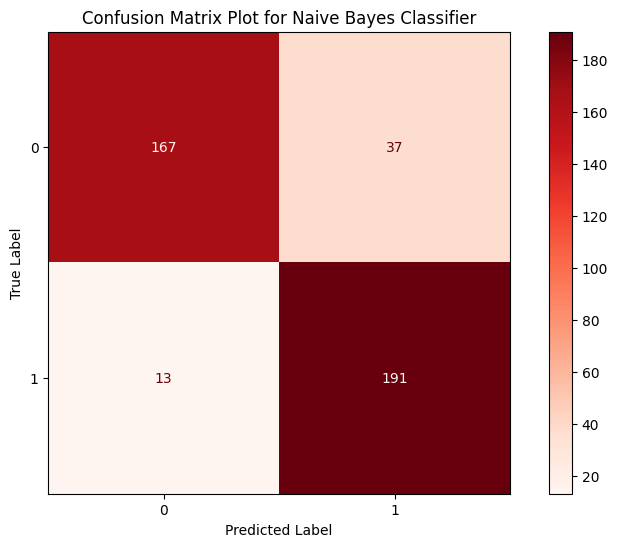

In [17]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [18]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



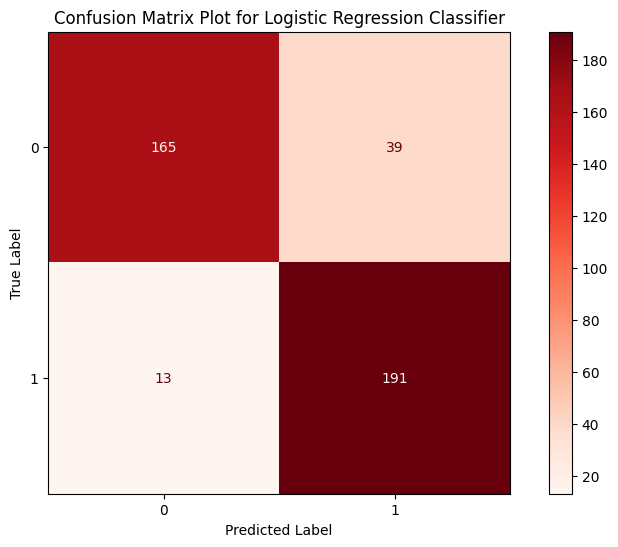

In [20]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

##**Decision Tree**

In [21]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

In [22]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



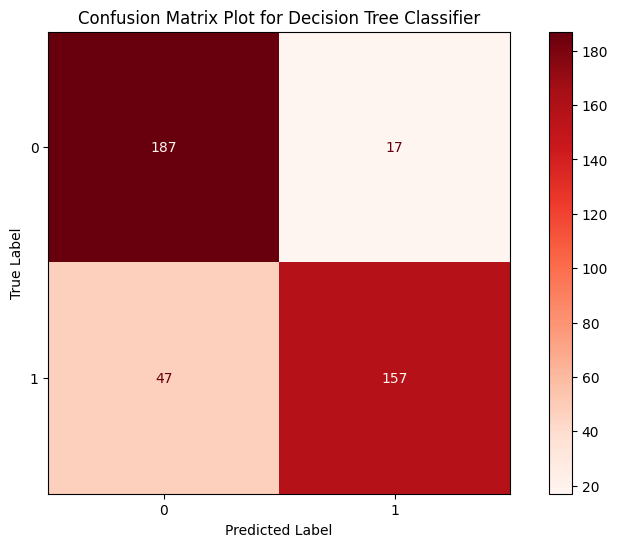

In [23]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [24]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [25]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



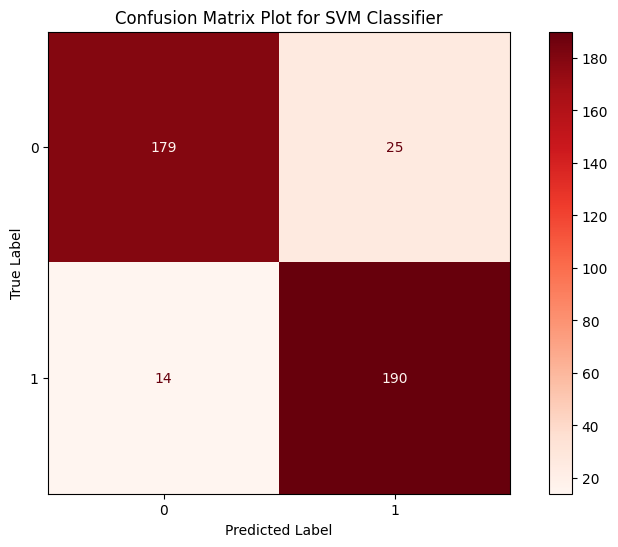

In [26]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [27]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



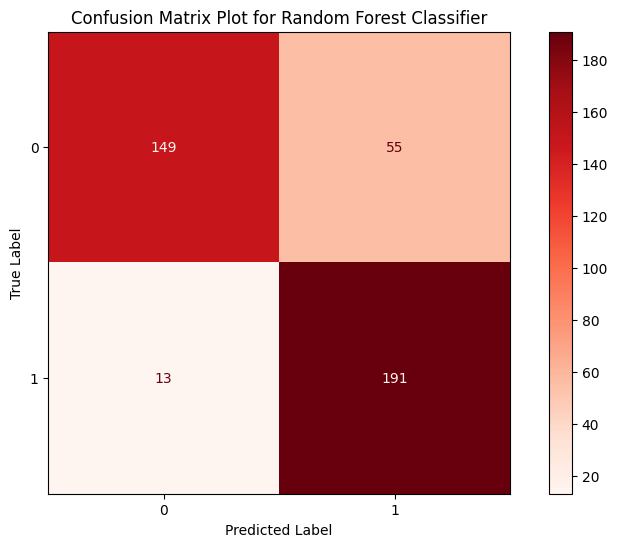

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [29]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log_loss',penalty='l2', max_iter=10).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[179  25]
 [ 16 188]]
0.8995098039215687
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       204
           1       0.88      0.92      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



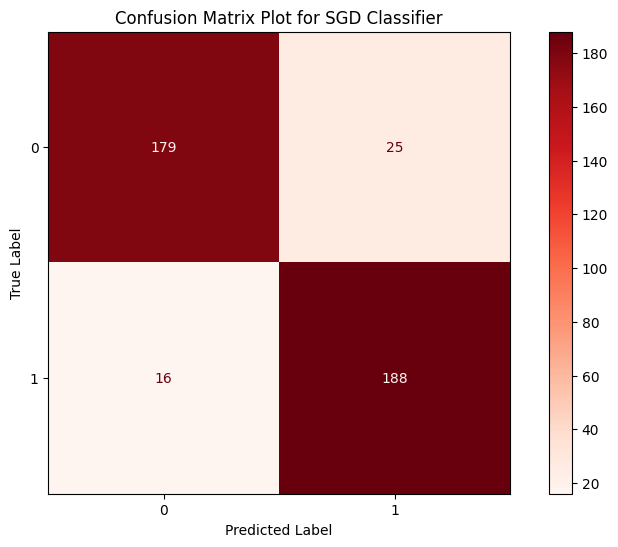

In [31]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = ConfusionMatrixDisplay.from_estimator(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [32]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [33]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}

rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)


[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



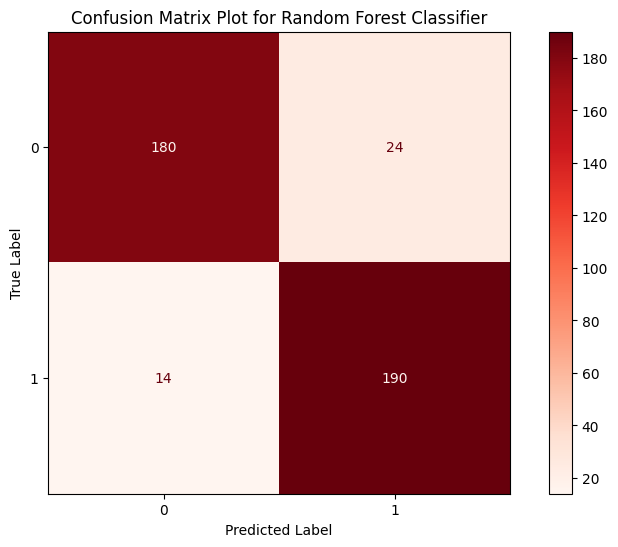

In [34]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = ConfusionMatrixDisplay.from_estimator(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [35]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 640x480 with 0 Axes>

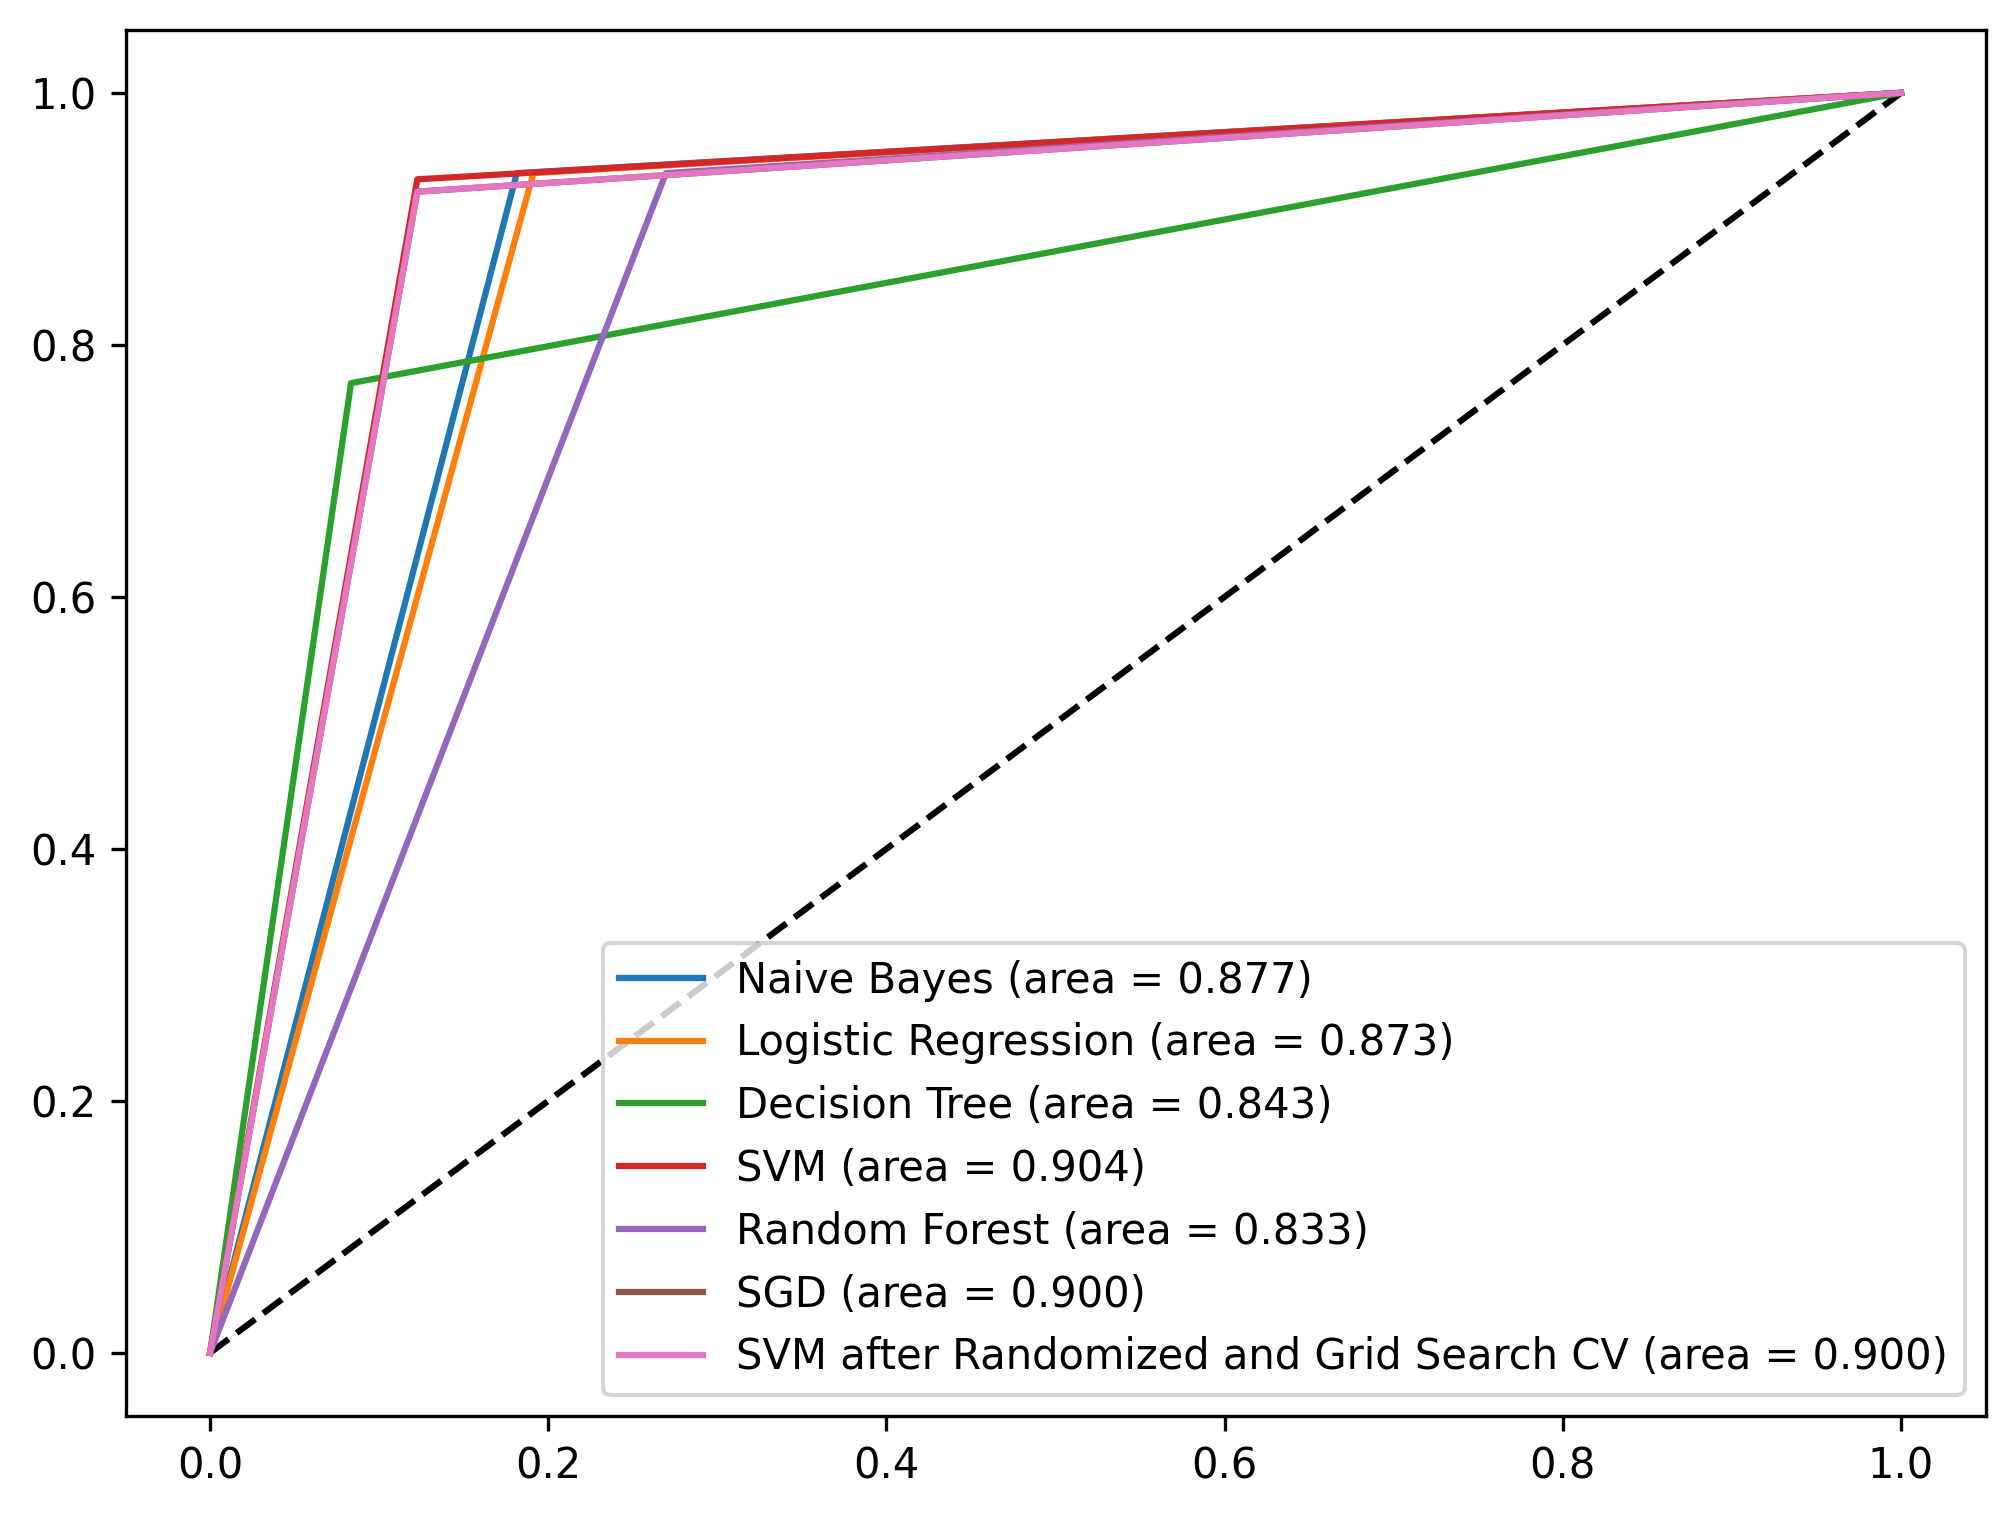

In [36]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after Randomized and Grid Search CV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()